### 1. A simple function
Create a 5*5 identity matrix.

In [1]:
import numpy as np

def iden(n):
    print(np.identity(n))
iden(5)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


### 2. Linear Regression with one variable

#### 2.1 Plotting the Data

In [151]:
import pandas as pd
data=pd.read_csv("/Users/natalychacon/Documents/Machine Learning/std coursera/machine-learning-ex/ex1/ex1data1.txt",header=None)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [111]:
x = data.loc[:,[0]]
x.insert(0,"0",1)
y = data.loc[:,[1]]

Text(0, 0.5, 'Profit in $10,000s')

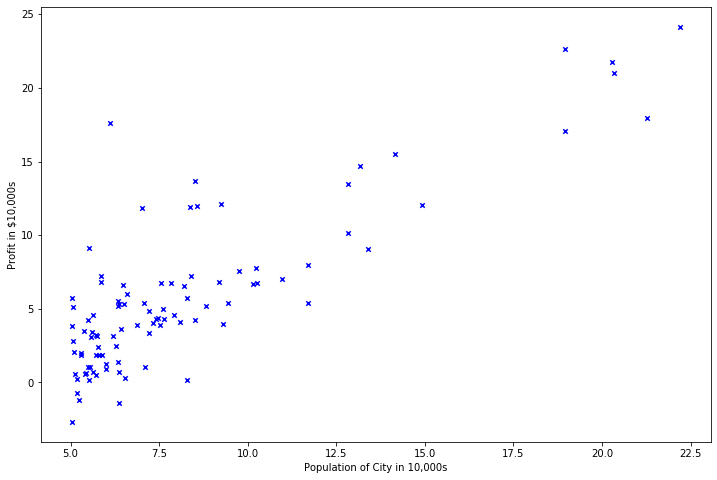

In [5]:
import matplotlib.pyplot as plt
ax=data.plot(kind='scatter',x=0,y=1,color='blue',marker="x",figsize=(12,8))
ax.set_xlabel("Population of City in 10,000s")
ax.set_ylabel("Profit in $10,000s")

#### 2.2 Cost Function

In [6]:
import numpy as np

m = len(data) #Returns number of training examples, or number of rows
iterations = 1500
alpha = 0.01
theta = np.matrix(np.array([[0],[0]]))
X = np.matrix(x)
y = np.matrix(y)

In [7]:
def computeCost(X,y,theta):
    m = np.size(y,0)
    resultado = (1/(2*m))*(np.sum(np.power(np.matmul(X,theta)-y,2),axis=0)) 
    return resultado.item(0)

In [8]:
computeCost(X,y,theta)

32.072733877455676

In [9]:
thetan=np.matrix(np.array([[-1],[2]]))
computeCost(X,y,thetan)

54.24245508201238

#### 2.3 Gradient Descent

In [10]:
def gradientDescent(X,y,theta,alpha,iteration):
    m = np.size(y,0)
    temporal = np.matrix(np.zeros(theta.shape))
    J_history=[]
    for i in range(iterations+1):
        
        temporal[0,:]=theta[0,:]-(alpha*1/m*(np.sum(np.multiply(np.matmul(X,theta)-y,X[:,0]))))
        temporal[1,:]=theta[1,:]-(alpha*1/m*(np.sum(np.multiply(np.matmul(X,theta)-y,X[:,1]))))
        theta=temporal
       
            
        J_history.append(computeCost(X,y,theta))
    return(theta)
    

In [11]:
theta=gradientDescent(X,y,theta,alpha,iterations)
print(theta)

[[-3.63656668]
 [ 1.16703962]]


Plot the linear fit.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

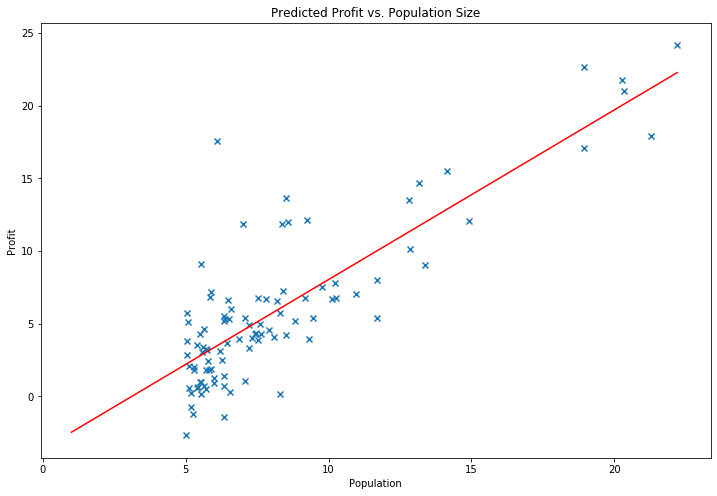

In [12]:
xaxis = np.linspace(X.min(),X.max(),100)
yaxis = theta[0,0]+ (theta[1,0]*xaxis)
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(xaxis,yaxis,"r",label='Prediction')
ax.scatter(data[0], data[1], label='Traning Data',marker="x")
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

### 3. Linear Regression with multiple variables
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices

In [132]:
data2=pd.read_csv("/Users/natalychacon/Documents/Machine Learning/std coursera/machine-learning-ex/ex1/ex1data2.txt",header=None)
data2.columns = ['Size', 'Bedrooms',"Price"]
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### 3.1 Feature Normalization
By looking at the values of the dataset note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

1.Subtract the mean value of each feature from the dataset.
2.After subtracting the mean, additionally scale (divide) the feature values by their respective "standard deviations".

In [148]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


#### 3.2 Gradient Descent

In [140]:
X = data2.loc[:,["Size","Bedrooms"]]#size of houses#number of bedrooms #features#Training data
X.insert(0,"0",1)
y = data2.loc[:,["Price"]]#target variable

In [141]:
# convert to matrices and initialize theta
theta = np.matrix(np.array([[0],[0],[0]]))
alpha = 0.1
num_iters=400
X = np.matrix(X)
y = np.matrix(y)


In [146]:
def gradientDescent(X,y,theta,alpha,iteration):
    m = np.size(y,0)
    temporal = np.matrix(np.zeros(theta.shape))
    for i in range(iterations+1):
        mult=np.matmul(X,theta)-y
        for j in range(X.shape[1]):
            temporal[j,:]=theta[j,:]-(alpha*1/m*(np.sum(np.multiply(mult,X[:,j]))))
        theta=temporal      
    return(theta)

In [152]:
theta=gradientDescent(X,y,theta,alpha,num_iters)
print(theta)

[[-7.62392513e-17]
 [ 8.84765988e-01]
 [-5.31788197e-02]]
